In [1]:
#Import data

import pandas as pd
data = pd.read_csv("thanksgiving-2015-poll-data.csv")

In [2]:
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [3]:
data.index

RangeIndex(start=0, stop=1058, step=1)

In [4]:
data.shape

(1058, 65)

In [28]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [5]:
data.columns[50:]

Index(['Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify).1',
       'Do you typically pray before or after the Thanksgiving meal?',
       'How far will you travel for Thanksgiving?',
       'Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade',
       'What's the age cutoff at your "kids' table" at Thanksgiving?',
       'Have you ever tried to meet up with hometown friends on Thanksgiving night?',
       'Have you ever attended a "Friendsgiving?"',
       'Will you shop any Black Friday sales on Thanksgiving Day?',
       'Do you work in retail?',
       'Will you employer make you work on Black Friday?',
       'How would you describe where you live?', 'Age', 'What is your gender?',
       'How much total combined money did all members of your HOUSEHOLD earn last year?',
       'US Region'],
      dtype='object')

In [30]:
data["new"] = 0

In [31]:
data.shape

(1058, 68)

In [7]:
data["What is your gender?"].value_counts(dropna = False)

#NA - Missing 

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [8]:
def gender_code(gender_string):
    if isinstance(gender_string,float):
        return gender_string
    return int (gender_string == "Female")




In [9]:
data["gender"] = data["What is your gender?"].apply(lambda x :  int(x == "Female"))

In [10]:
data["gender"].value_counts()

1    544
0    514
Name: gender, dtype: int64

In [11]:
data.apply(lambda x : x.dtype).head()

RespondentID                                                                             object
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

In [12]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(dropna = False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [13]:
import numpy as np
import math
def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value,float) and math.isnan(value):
        return np.nan
    value = value.replace(",","").replace("$","")
    income_low, income_high = value.split(" to ")
    return (int(income_low)+int(income_high))/2


In [14]:
data['income'] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)

In [15]:
data['income'].value_counts()

37499.5     180
62499.5     135
87499.5     133
112499.5    111
200000.0     80
17499.5      68
4999.5       66
137499.5     49
162499.5     40
187499.5     27
Name: income, dtype: int64

In [40]:
data['What type of cranberry saucedo you typically have?'].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [46]:
homemade_filter = data["What type of cranberry saucedo you typically have?"] == "Homemade"
homemade = data[homemade_filter]

canned_filter = data["What type of cranberry saucedo you typically have?"] == "Canned"
Canned = data[canned_filter]

In [47]:
homemade.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain,0,4999.5
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific,0,200000.0
5,4337929779,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Pacific,0,4999.5
7,4337916002,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,Rural,18 - 29,Male,Prefer not to answer,Mountain,0,NaN
13,4337878450,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Middle Atlantic,0,4999.5


In [49]:
Canned.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific,0,112499.5
6,4337924420,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,Yes,No,Rural,18 - 29,Male,"$25,000 to $49,999",East North Central,0,37499.5
8,4337914977,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$75,000 to $99,999",Middle Atlantic,0,87499.5
11,4337893416,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Suburban,30 - 44,Male,"$25,000 to $49,999",Middle Atlantic,0,37499.5
12,4337888291,Yes,Ham/Pork,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",East North Central,0,4999.5


In [51]:
homemade["income"].mean()

94878.1072874494

In [53]:
Canned["income"].mean()

83823.40340909091

In [22]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped.groups
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [23]:
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [24]:
print(type(grouped))
for name,group in grouped:
    print(name)
    print(group.size)
    print(type(group))

<class 'pandas.core.groupby.DataFrameGroupBy'>
Canned
33634
<class 'pandas.core.frame.DataFrame'>
Homemade
20167
<class 'pandas.core.frame.DataFrame'>
None
9782
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
1675
<class 'pandas.core.frame.DataFrame'>


In [25]:
grouped["income"].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: income, dtype: int64

In [27]:
grouped["income"].agg(np.std)

What type of cranberry saucedo you typically have?
Canned                    55835.478014
Homemade                  62251.937645
None                      54562.750866
Other (please specify)    54175.781001
Name: income, dtype: float64

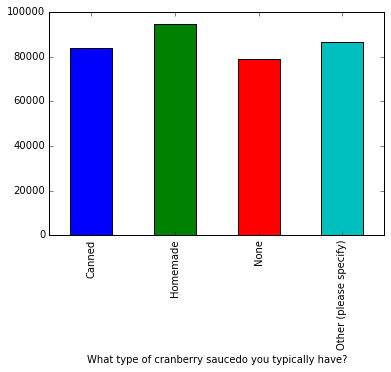

In [77]:
%matplotlib inline

sauce = grouped.agg(np.mean)

sauce["income"].plot(kind = "bar")

In [80]:
grouped_multi = data.groupby(["What type of cranberry saucedo you typically have?","What is typically the main dish at your Thanksgiving dinner?"])

In [82]:
grouped_multi.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             4.336354e+09   
                                                   Ham/Pork                                            4.336757e+09   
                                                   I don't know                                        4.335987e+09   
                                                   Other (please specify)                              4.336682e+09   
                                                   Roast beef                                          4.336254e+09   
                                                   Tofurkey                                            4.337157e+09   
                                                   Turkey                                              4.336705e+09   
Homemade                                           Chicken                                             4.336540e+09   
                                                   Ham/Pork                                            4.337253e+09   
                                                   I don't know                                        4.336084e+09   
                                                   Other (please specify)                              4.336863e+09   
                                                   Roast beef                                          4.336174e+09   
                                                   Tofurkey                                            4.336790e+09   
                                                   Turducken                                           4.337475e+09   
                                                   Turkey                                              4.336791e+09   
None                                               Chicken                                             4.336151e+09   
                                                   Ham/Pork                                            4.336680e+09   
                                                   I don't know                                        4.336412e+09   
                                                   Other (please specify)                              4.336688e+09   
                                                   Roast beef                                          4.337424e+09   
                                                   Tofurkey                                            4.336950e+09   
                                                   Turducken                                           4.336739e+09   
                                                   Turkey                                              4.336784e+09   
Other (please specify)                             Ham/Pork                                            4.336465e+09   
                                                   Other (please specify)                              4.337335e+09   
                                                   Tofurkey                                            4.336122e+09   
                                                   Turkey                                              4.336724e+09   

                                                                                                         gender  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             0.333333   
                                                   Ham/Pork                                            0.600000   
                                                   I don't know                                        0.000000   
                                                   Other (please specify)   

In [84]:
grouped_multi["income"].agg([np.mean,np.sum,np.std]).head(20)

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.600000   
                                                   Ham/Pork                                             77499.535714   
                                                   I don't know                                          4999.500000   
                                                   Other (please specify)                               53213.785714   
                                                   Roast beef                                           25499.500000   
                                                   Tofurkey                                            100713.857143   
                                                   Turkey                                               85242.682045   
Homemade                                           Chicken                                              19999.500000   
                                                   Ham/Pork                                             96874.625000   
                                                   I don't know                                                  NaN   
                                                   Other (please specify)                               55356.642857   
                                                   Roast beef                                           33749.500000   
                                                   Tofurkey                                             57916.166667   
                                                   Turducken                                           200000.000000   
                                                   Turkey                                               97690.147982   
None                                               Chicken                                              11249.500000   
                                                   Ham/Pork                                             61249.500000   
                                                   I don't know                                         33749.500000   
                                                   Other (please specify)                              119106.678571   
                                                   Roast beef                                          162499.500000   

                                                                                                              sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                               404998.0   
                                                   Ham/Pork                                             1084993.5   
                                                   I don't know                                            4999.5   
                                                   Other (please specify)                                372496.5   
                                                   Roast beef                                            127497.5   
                                                   Tofurkey                                              704997.0   
                                                   Turkey                                              34182315.5   
Homemade                                           Chicken                                                59998.5   
                                                   Ham/Pork                                              387498.5   
                                                   I don't know                                               0.0   
                                                   Other (please sp

In [92]:
grouped.apply(lambda x : type(x))

What type of cranberry saucedo you typically have?
Canned                    <class 'pandas.core.frame.DataFrame'>
Homemade                  <class 'pandas.core.frame.DataFrame'>
None                      <class 'pandas.core.frame.DataFrame'>
Other (please specify)    <class 'pandas.core.frame.DataFrame'>
dtype: object

In [104]:
a = pd.isna(data)

In [105]:
a.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
0,False,False,False,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False


In [107]:
data.dropna(how = "any")
#data.fillna(value = 0)

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income


In [109]:
pd.DataFrame.fillna?